Esercizio 1: Analisi delle Vendite per Categoria

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sales_sample.csv')
df

,Product,Category,Sales,Revenue,Date
0,Product_1,Toys,4781,24575,2022-02-15
1,Product_2,Books,7140,9245,2022-11-27
2,Product_3,Groceries,2677,69655,2023-08-17
3,Product_4,Toys,5554,64093,2023-10-05
4,Product_5,Clothing,5770,28278,2022-01-27
...,...,...,...,...,...
995,Product_996,Clothing,3333,66527,2022-07-25
996,Product_997,Furniture,4763,49709,2022-10-14
997,Product_998,Electronics,1778,90622,2023-02-04
998,Product_999,Electronics,3257,19033,2022-11-20


In [4]:
report1 = df.groupby("Category").agg(
    Total_Sales=('Sales', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
)
report1_sorted = report1.sort_values(by='Total_Sales', ascending=False)
report1_sorted


,Total_Sales,Total_Revenue
Category,,
Clothing,947256,9312077
Groceries,905700,7789148
Toys,822995,8025790
Furniture,815707,8621606
Electronics,802691,8069064
Books,779749,8130955


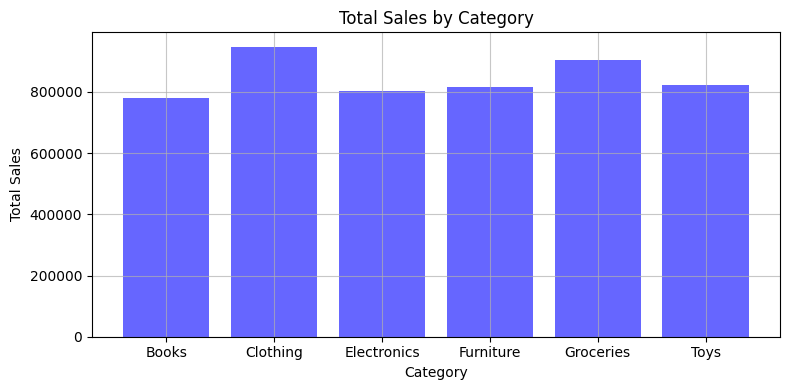

In [5]:
plt.figure(figsize=(8, 4))
plt.bar(report1.index, report1['Total_Sales'], color='blue', alpha=0.6, label='Total Sales')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.grid(axis='both', alpha=0.7)

plt.tight_layout()

Esercizio 2: Analisi delle Vendite Mensili

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sales_sample.csv')
df

,Product,Category,Sales,Revenue,Date
0,Product_1,Toys,4781,24575,2022-02-15
1,Product_2,Books,7140,9245,2022-11-27
2,Product_3,Groceries,2677,69655,2023-08-17
3,Product_4,Toys,5554,64093,2023-10-05
4,Product_5,Clothing,5770,28278,2022-01-27
...,...,...,...,...,...
995,Product_996,Clothing,3333,66527,2022-07-25
996,Product_997,Furniture,4763,49709,2022-10-14
997,Product_998,Electronics,1778,90622,2023-02-04
998,Product_999,Electronics,3257,19033,2022-11-20


In [7]:
df["YearMonth"] = pd.to_datetime(df["Date"]).dt.to_period("M")

report2 = df.groupby(["YearMonth"]).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
).reset_index()
report2

,YearMonth,Total_Sales,Total_Revenue
0,2022-01,160334,1792920
1,2022-02,174188,1860457
2,2022-03,200444,2002693
3,2022-04,186254,1986858
4,2022-05,178802,2129234
5,2022-06,254400,2249323
6,2022-07,259479,2733829
7,2022-08,203175,2245126
8,2022-09,172293,1453283
9,2022-10,288088,2884051


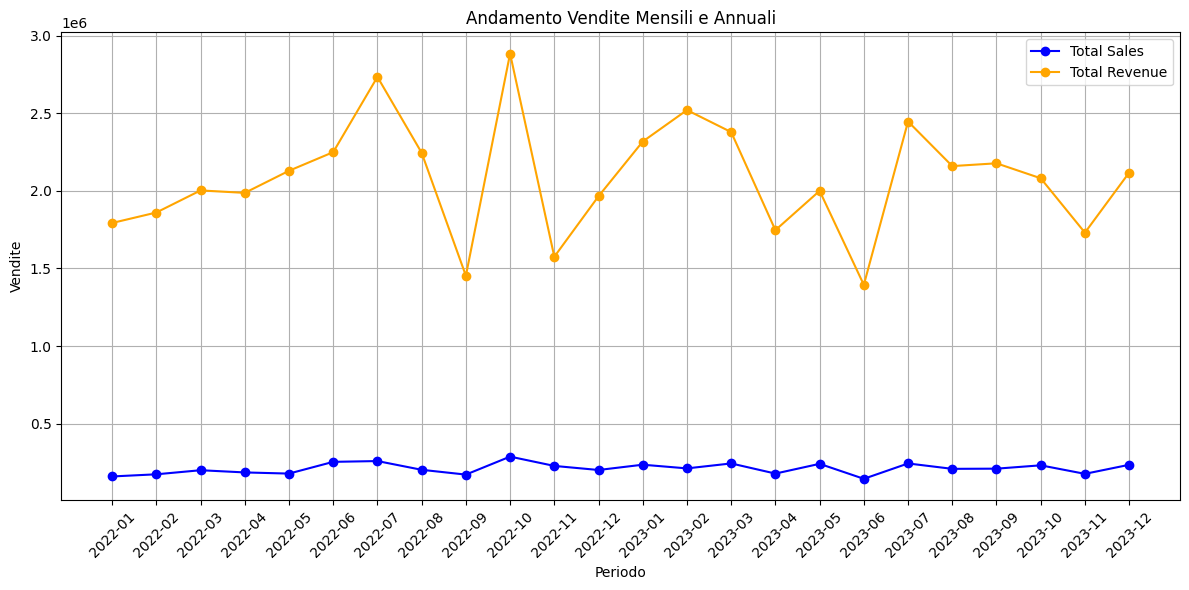

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(report2['YearMonth'].astype(str), report2['Total_Sales'], marker='o', label='Total Sales', color='blue')
plt.plot(report2['YearMonth'].astype(str), report2['Total_Revenue'], marker='o', label='Total Revenue', color='orange')
plt.title('Andamento Vendite Mensili e Annuali')
plt.xlabel('Periodo')
plt.ylabel('Vendite')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

Esercizio 3: Top 5 Prodotti per Ricavi

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sales_sample.csv')
df

,Product,Category,Sales,Revenue,Date
0,Product_1,Toys,4781,24575,2022-02-15
1,Product_2,Books,7140,9245,2022-11-27
2,Product_3,Groceries,2677,69655,2023-08-17
3,Product_4,Toys,5554,64093,2023-10-05
4,Product_5,Clothing,5770,28278,2022-01-27
...,...,...,...,...,...
995,Product_996,Clothing,3333,66527,2022-07-25
996,Product_997,Furniture,4763,49709,2022-10-14
997,Product_998,Electronics,1778,90622,2023-02-04
998,Product_999,Electronics,3257,19033,2022-11-20


In [10]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df["Revenue"] = pd.to_numeric(df["Revenue"], errors='coerce')
df = df.dropna(subset=['Sales', 'Revenue'])
top_5_products = df.nlargest(5, 'Revenue')
top_5_products

,Product,Category,Sales,Revenue,Date
40,Product_41,Toys,5412,99967,2022-01-06
606,Product_607,Clothing,7828,99895,2022-08-27
134,Product_135,Electronics,4859,99882,2023-11-07
731,Product_732,Furniture,9509,99865,2022-07-18
804,Product_805,Toys,945,99674,2022-10-17


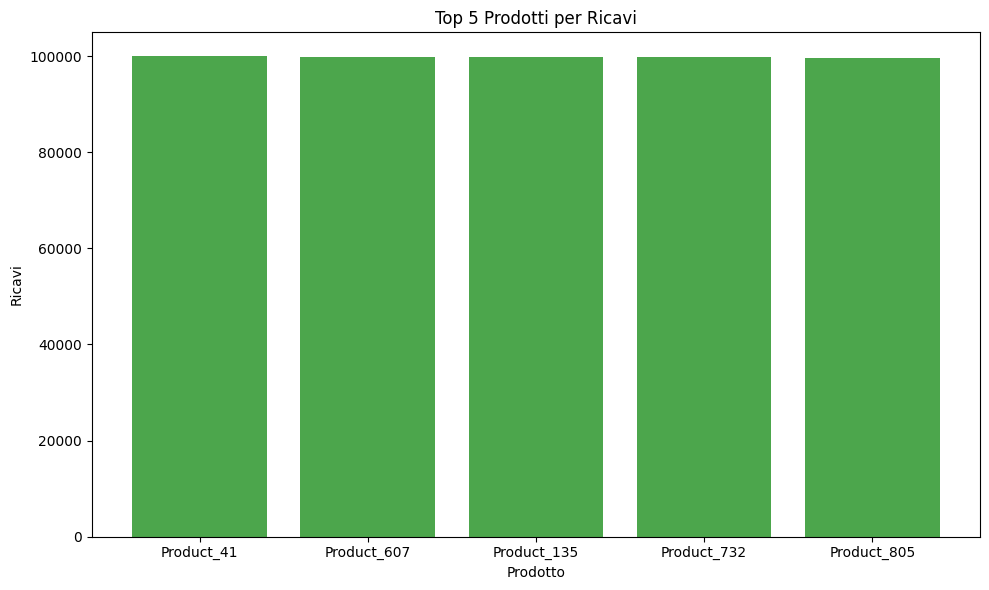

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_products['Product'], top_5_products['Revenue'], color='green', alpha=0.7)
plt.title('Top 5 Prodotti per Ricavi')
plt.xlabel('Prodotto')
plt.ylabel('Ricavi')
plt.tight_layout()

Analisi delle Categorie con il Maggiore Incremento di Vendite Mensili

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sales_sample.csv')
df

,Product,Category,Sales,Revenue,Date
0,Product_1,Toys,4781,24575,2022-02-15
1,Product_2,Books,7140,9245,2022-11-27
2,Product_3,Groceries,2677,69655,2023-08-17
3,Product_4,Toys,5554,64093,2023-10-05
4,Product_5,Clothing,5770,28278,2022-01-27
...,...,...,...,...,...
995,Product_996,Clothing,3333,66527,2022-07-25
996,Product_997,Furniture,4763,49709,2022-10-14
997,Product_998,Electronics,1778,90622,2023-02-04
998,Product_999,Electronics,3257,19033,2022-11-20


In [13]:
df["YearMonth"] = pd.to_datetime(df["Date"]).dt.to_period("M")
report3 = df.groupby(["Category","YearMonth"]).agg(
    Total_Sales=('Sales', 'sum'),
)
report3["IncrementoVendite"] = report3.groupby("Category")["Total_Sales"].diff()
report3

Total_Sales  IncrementoVendite
Category YearMonth                                
Books    2022-01          17232                NaN
         2022-02          24429             7197.0
         2022-03          35229            10800.0
         2022-04          17951           -17278.0
         2022-05          17175             -776.0
...                         ...                ...
Toys     2023-08          34212             3666.0
         2023-09          45003            10791.0
         2023-10          72338            27335.0
         2023-11           9137           -63201.0
         2023-12          47715            38578.0

[143 rows x 2 columns]

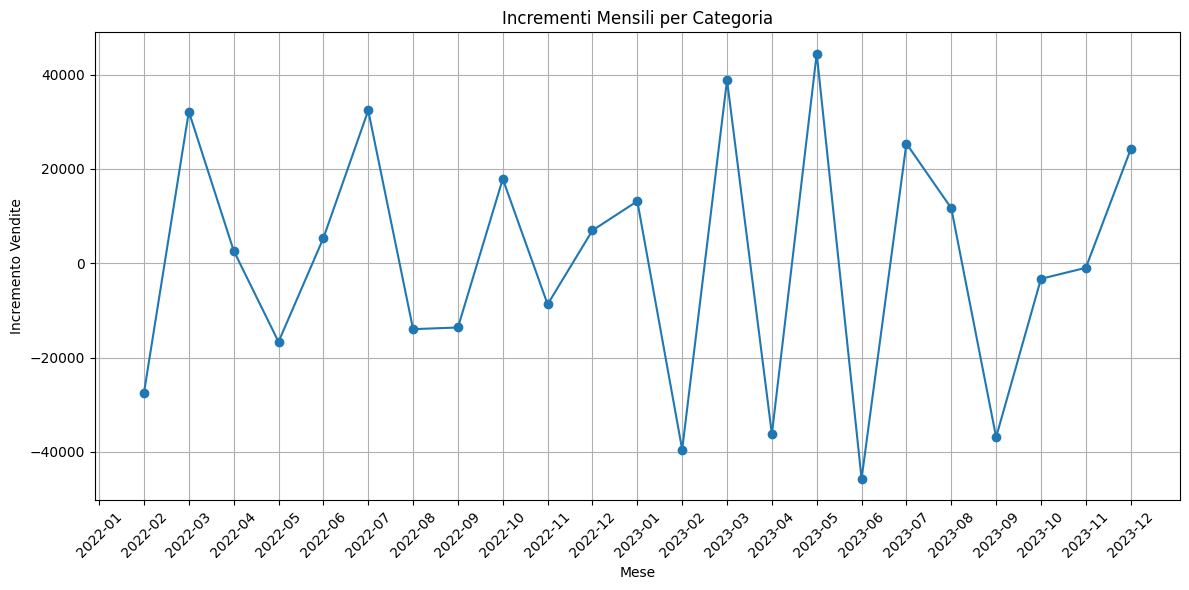

In [14]:
top_monthly_increase = report3.loc[report3['IncrementoVendite'].idxmax()]

# Extract the category and yearmonth from the index of the top increase
category_of_max = report3['IncrementoVendite'].idxmax()[0]

# Select all rows for that category
category_data = report3.loc[category_of_max]

plt.figure(figsize=(12, 6))
plt.plot(category_data.index.astype(str), category_data['IncrementoVendite'], marker='o')
plt.title('Incrementi Mensili per Categoria')
plt.xlabel('Mese')
plt.ylabel('Incremento Vendite')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()